# The Spark Foundation

## Task 2:- Prediction using unsupervised ML

### By:-  Ashwani Gautam

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
# Load the Iris dataset
iris=datasets.load_iris()

In [4]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### How do you find the optimal numer of clusters for k-mean?

In [6]:
x=iris_df.iloc[:,[0,1,2,3]].values

In [7]:
from sklearn.cluster import KMeans

In [8]:
# finding the optimal value of clusters
sse=[]
k_range=range(1,10)
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)

In [9]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.05845904095906,
 34.421674242424245,
 30.063110617452732,
 28.134920015148865]

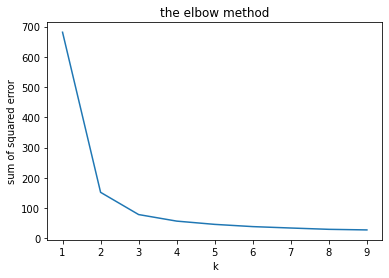

In [10]:
# Plotting the result onto graph,
# this allow us to observe 'the elbow'
plt.title('the elbow method')
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)

### From the above graph we can clearly see that the optimal value of cluster for k-means is '3' as it is the point where 'the elbow' occur. 

In [11]:
#Apply the k-means to the dataset with value of cluster is equal to 3
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(x)

In [12]:
y_pred=pd.DataFrame(y_pred)

In [13]:
y_pred.columns=['predict']
y_pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [14]:
y_pred['predict'].value_counts()

2    62
0    50
1    38
Name: predict, dtype: int64

In [15]:
iris_df['clusters']=y_pred

In [16]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df=iris_df.copy()

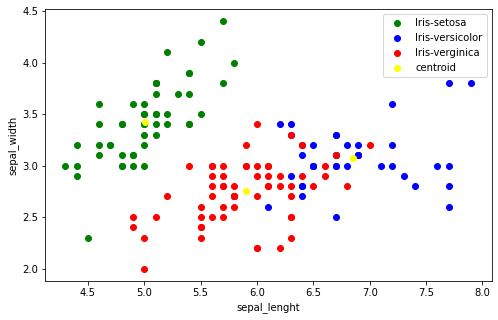

In [29]:
#visualising the clusters on the first two columns
plt.figure(figsize=(8,5))
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',label='Iris-setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',label='Iris-versicolor')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='red',label='Iris-verginica')
plt.xlabel('sepal_lenght')
plt.ylabel('sepal_width')

#plotting the centroid of the cluster
plt.scatter(km.cluster_centers_[:,[0]],km.cluster_centers_[:,[1]],color='yellow',label='centroid')
plt.legend()

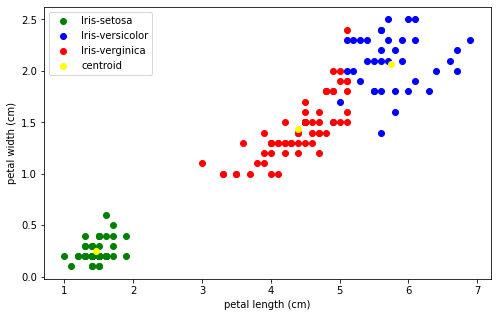

In [30]:
#visualising the clusters on the last two columns
plt.figure(figsize=(8,5))
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',label='Iris-setosa')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',label='Iris-versicolor')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red',label='Iris-verginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# plotting the centroids of the cluster
plt.scatter(km.cluster_centers_[:,[2]],km.cluster_centers_[:,[3]],color='yellow',label='centroid')
plt.legend()